In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib

In [2]:
df=pd.read_csv('solarpower.csv')

In [3]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
df.shape

(2920, 10)

In [7]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [9]:
df[df["average-wind-speed-(period)"].isnull()]


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
714,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


In [10]:
median_value = df["average-wind-speed-(period)"].median()
df["average-wind-speed-(period)"] = df["average-wind-speed-(period)"].fillna(median_value)


In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.128767,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.260333,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


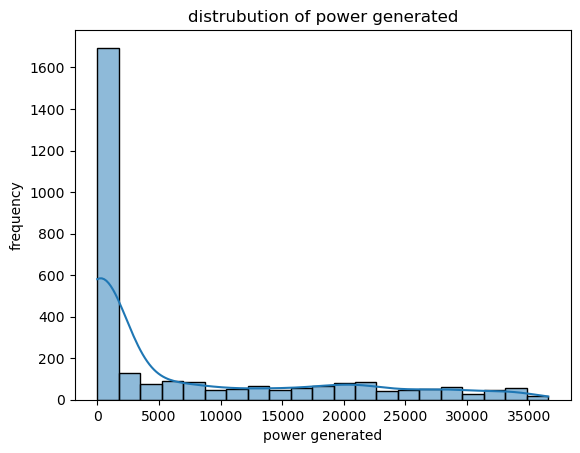

In [14]:
#target distrubution

sn.histplot(df["power-generated"],kde=True)
plt.title('distrubution of power generated')
plt.xlabel('power generated')
plt.ylabel('frequency')
plt.show()

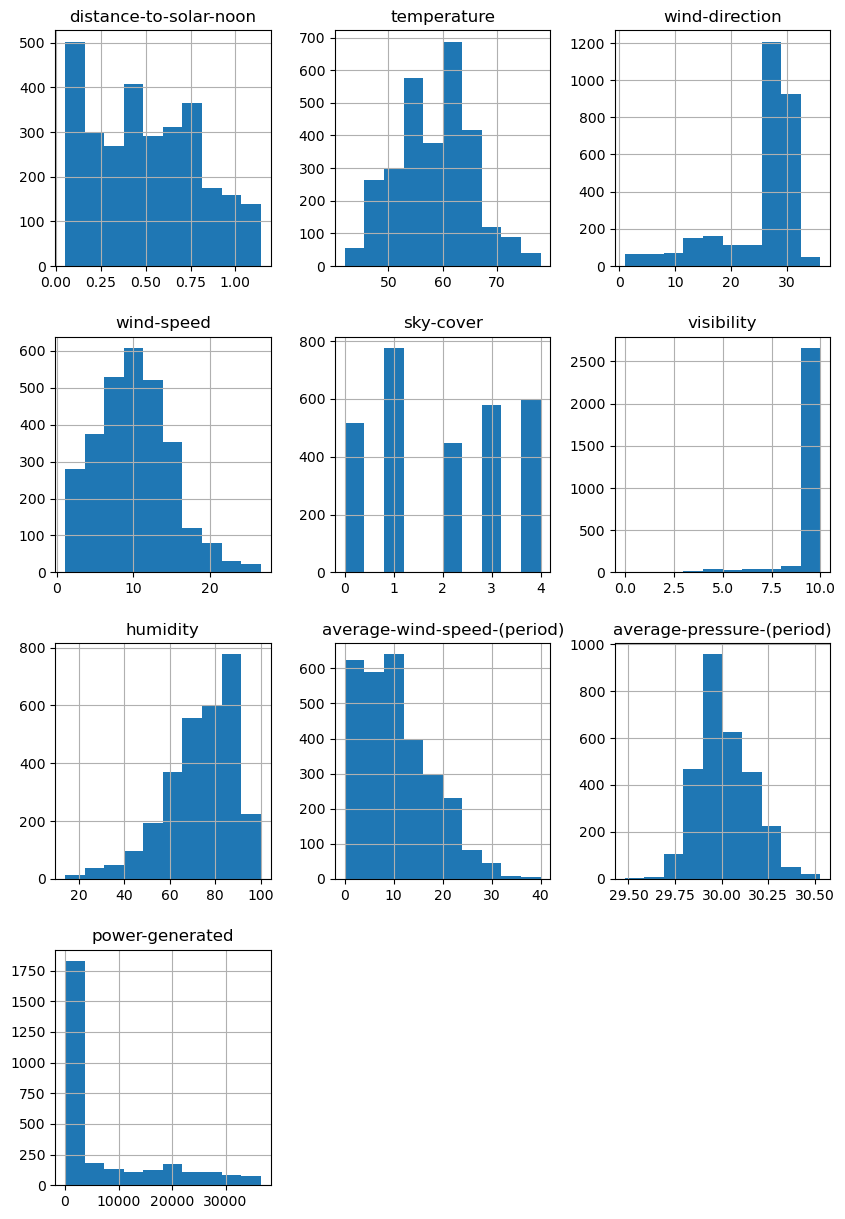

In [15]:
df.hist(figsize=(10,15))
plt.show()

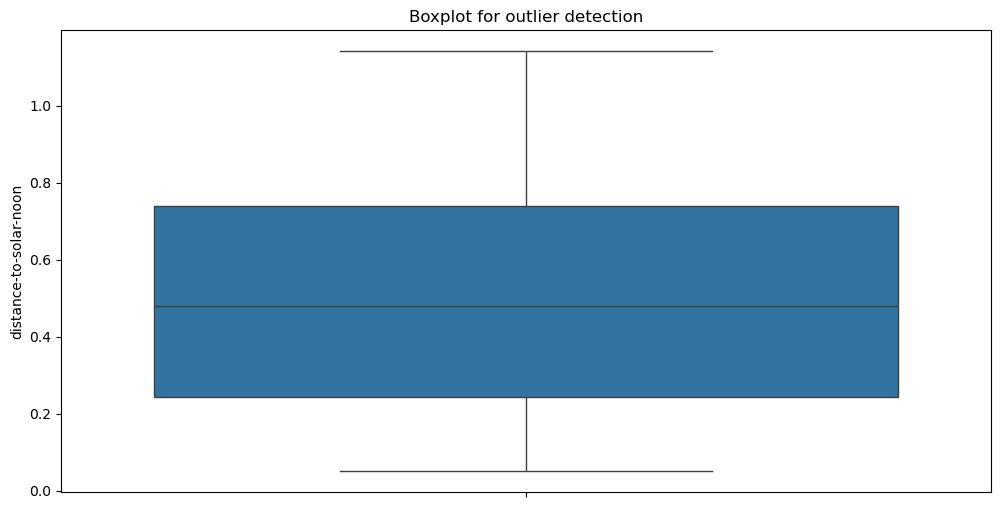

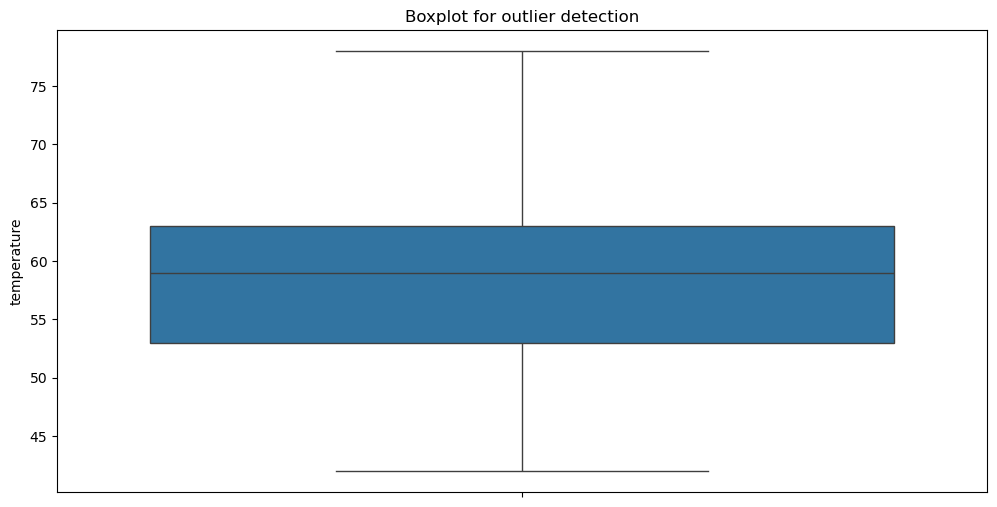

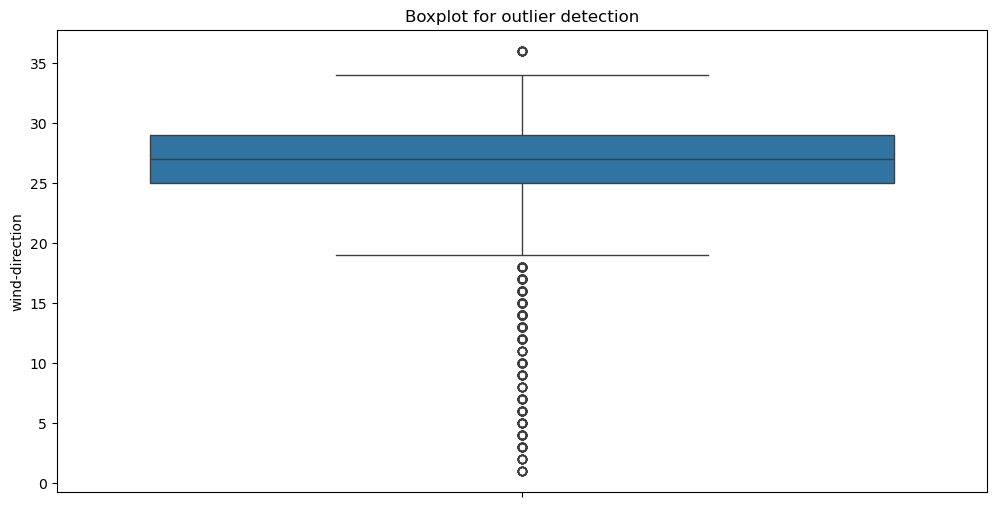

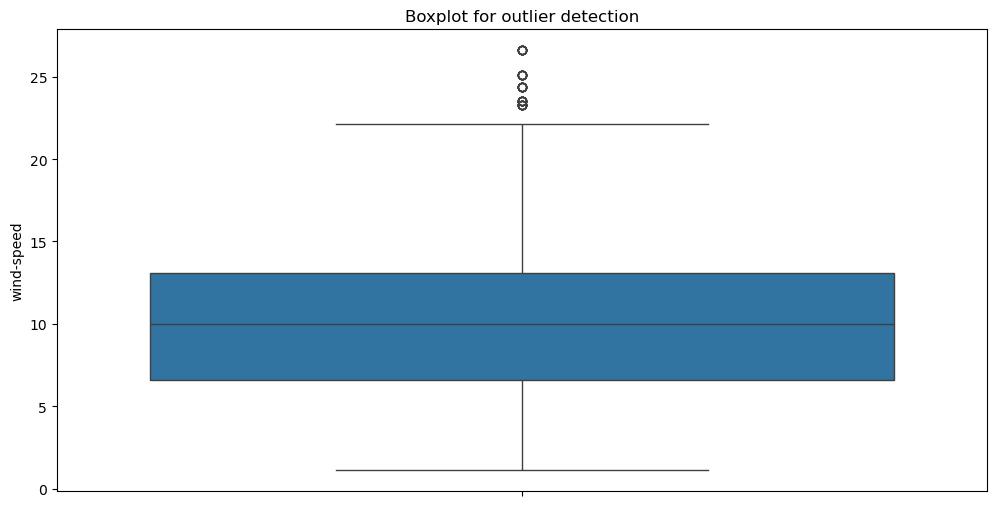

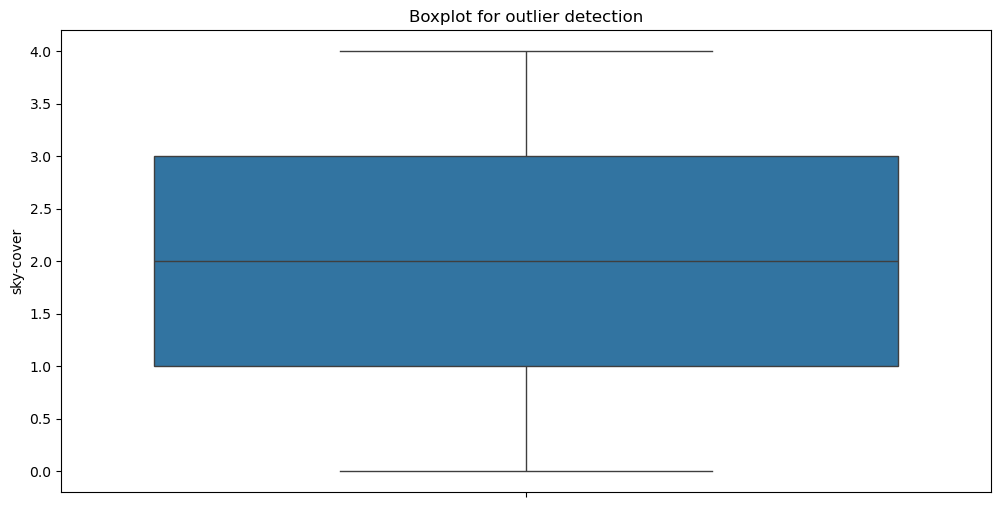

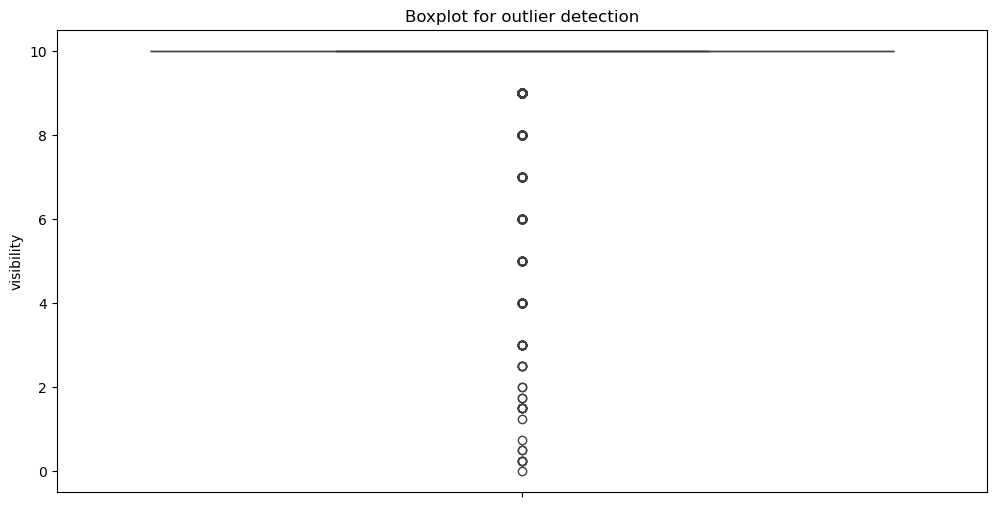

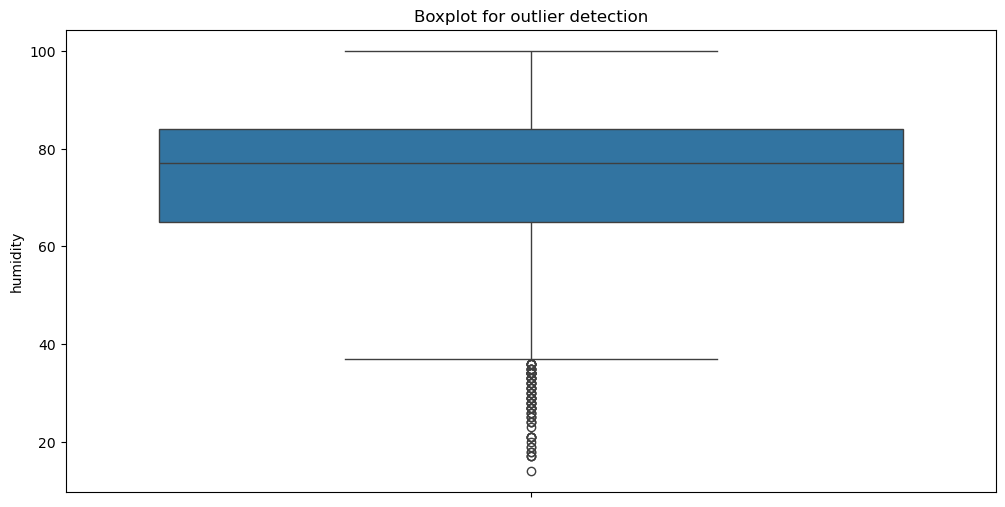

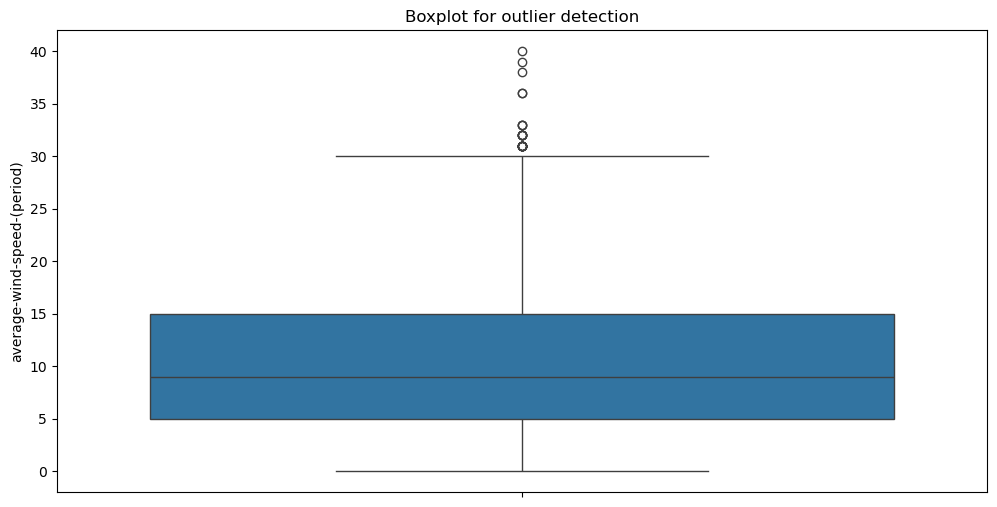

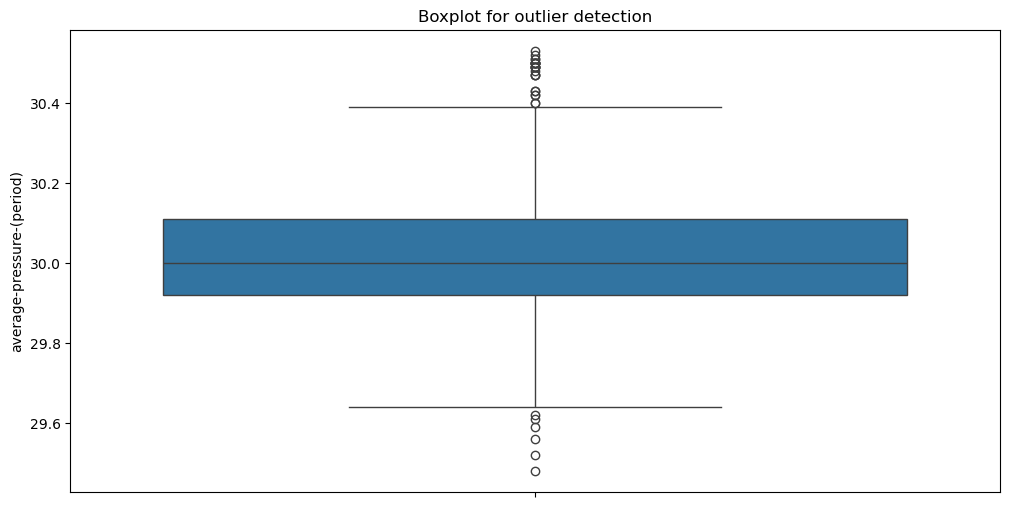

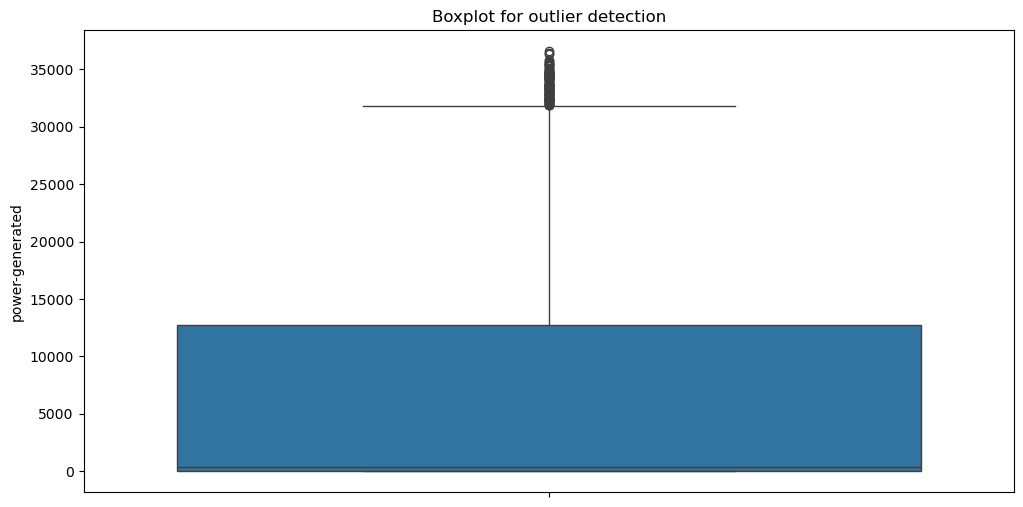

In [16]:
#outlier detection

for column in df.columns:
    plt.figure(figsize=(12,6))
    sn.boxplot(data=df[column])
    plt.xticks(rotation=90)
    plt.title("Boxplot for outlier detection")
    plt.show()



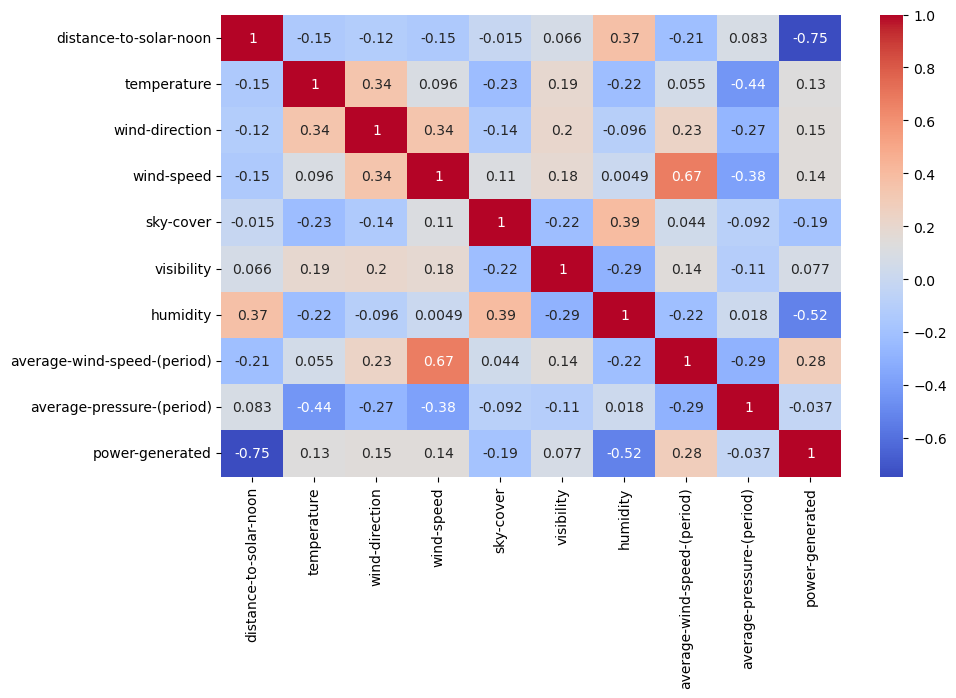

In [17]:
#correlation
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


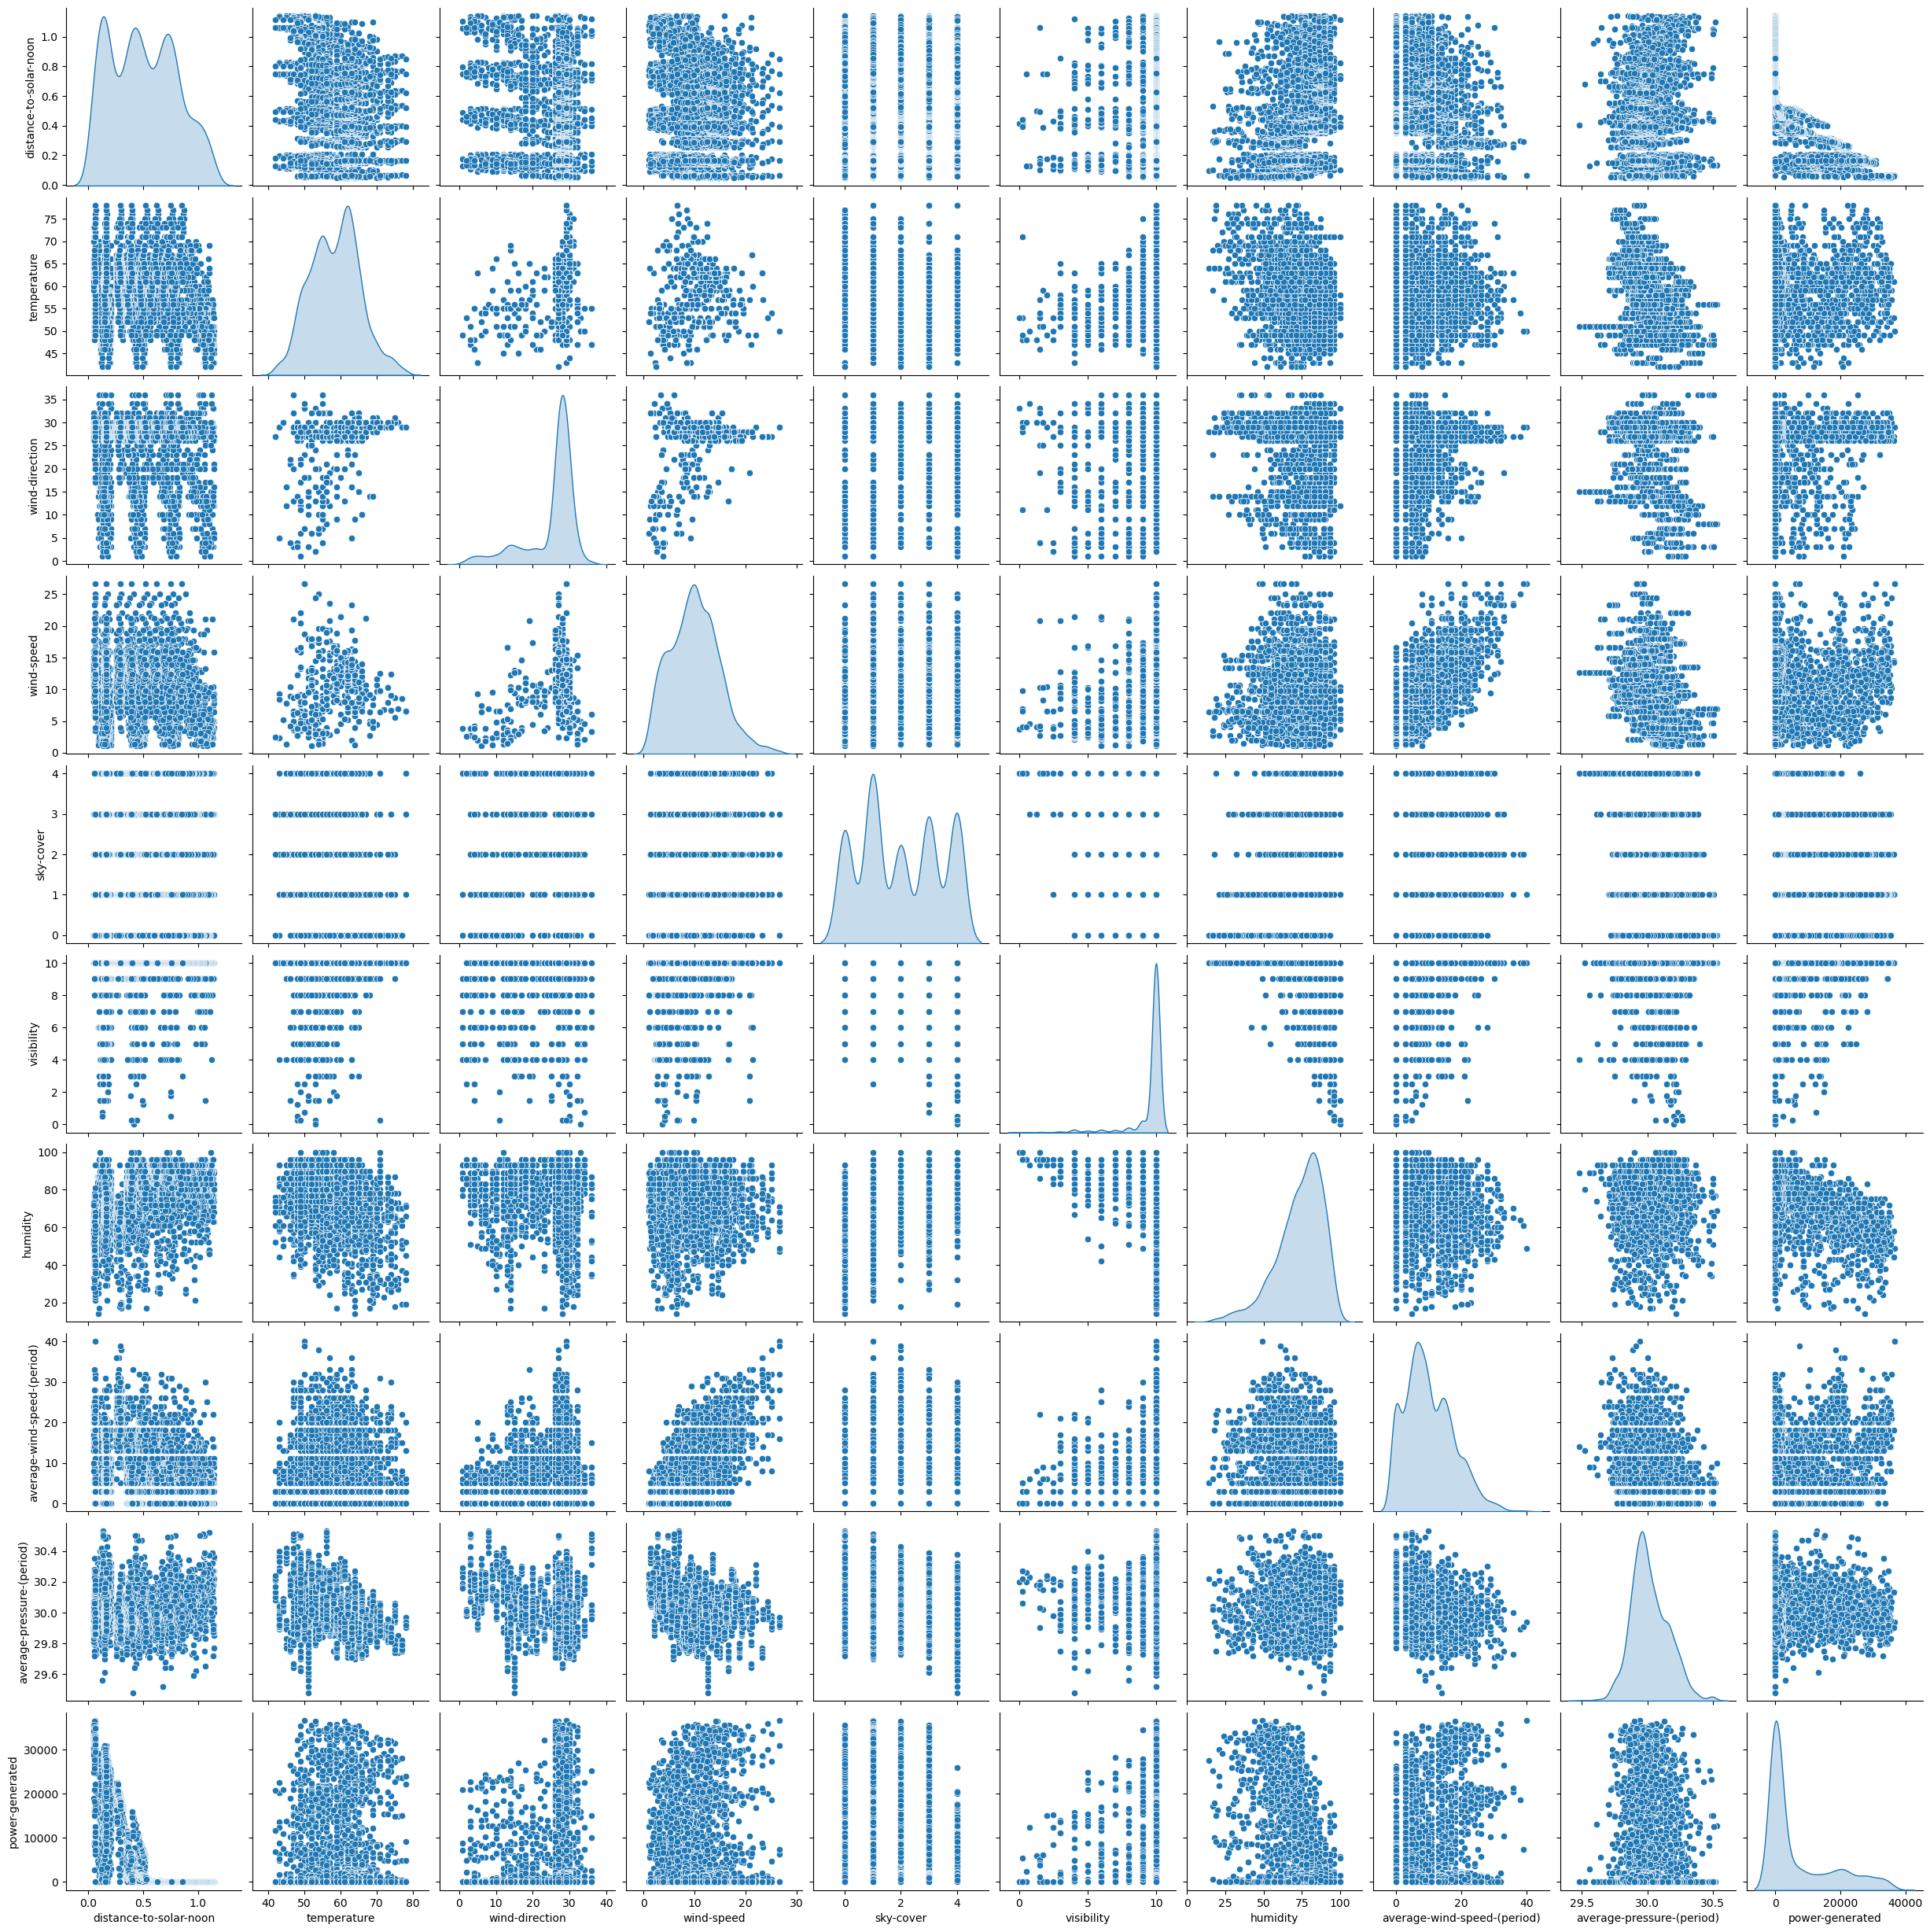

In [18]:
sn.pairplot(df,diag_kind='kde')
plt.show()


In [19]:
#feature and target split

x=df.drop('power-generated',axis=1)
y=df['power-generated']

In [20]:
#train-test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#scaling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### Model Building

###### Linear Regression

In [22]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_hat=lr.predict(x_test_scaled)

lr_rmse=np.sqrt(mean_squared_error(y_test, y_hat))
lr_mae=mean_absolute_error(y_test, y_hat)
lr_r2=r2_score(y_test, y_hat)

print('lr_rmse',lr_rmse)
print('lr_mae',lr_mae)
print('lr_r2',lr_r2)

lr_rmse 6284.499606527578
lr_mae 4981.154255786569
lr_r2 0.62506152958632


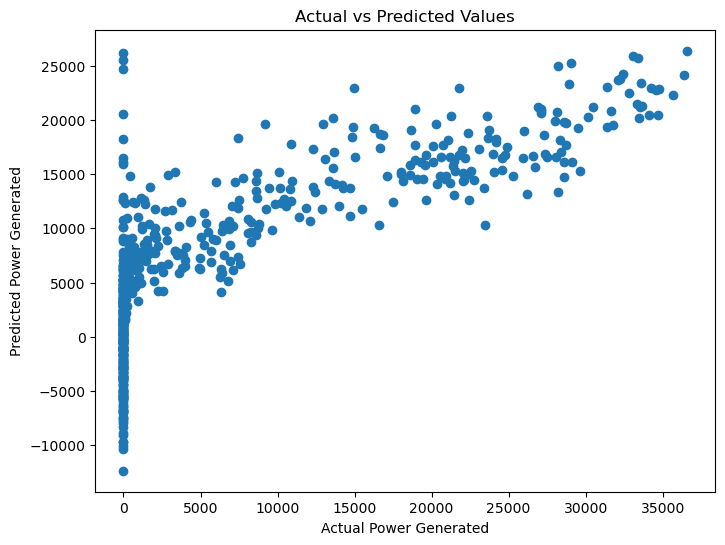

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted Values")
plt.show()

###### Gradient Descent

In [24]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(x_train_scaled, y_train)
y_hat= sgd.predict(x_test_scaled)

sgd_rmse = np.sqrt(mean_squared_error(y_test, y_hat))
sgd_mae=mean_absolute_error(y_test, y_hat)
sgd_r2 = r2_score(y_test, y_hat)

print('sgd_rmse',sgd_rmse)
print('sgd_mae',sgd_mae)
print('sgd_r2',sgd_r2)

sgd_rmse 6298.7839416585075
sgd_mae 4995.183486287097
sgd_r2 0.6233551619309456


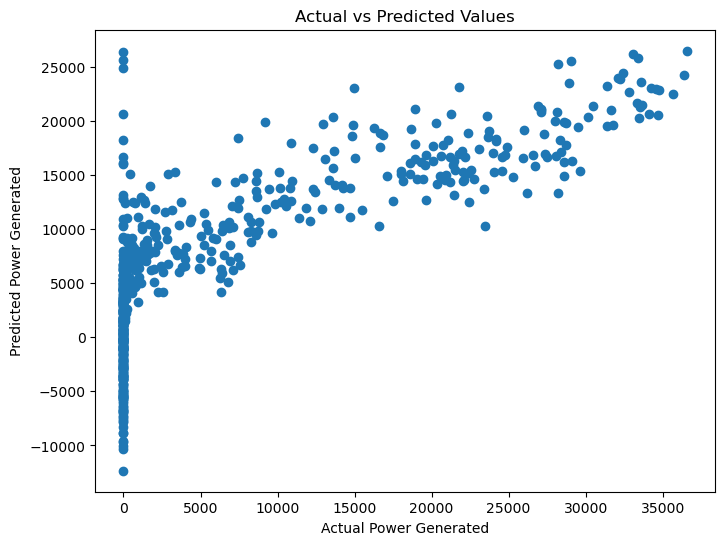

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted Values")
plt.show()

###### Decision Tree

In [26]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_hat = dt.predict(x_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, y_hat))
dt_mae=mean_absolute_error(y_test,y_hat)
dt_r2 = r2_score(y_test, y_hat)

print('dt_rmse',dt_rmse)
print('dt_mae',dt_mae)
print('dt_r2',dt_r2)

dt_rmse 4439.850798508177
dt_mae 1999.2568493150684
dt_r2 0.8128648591958793


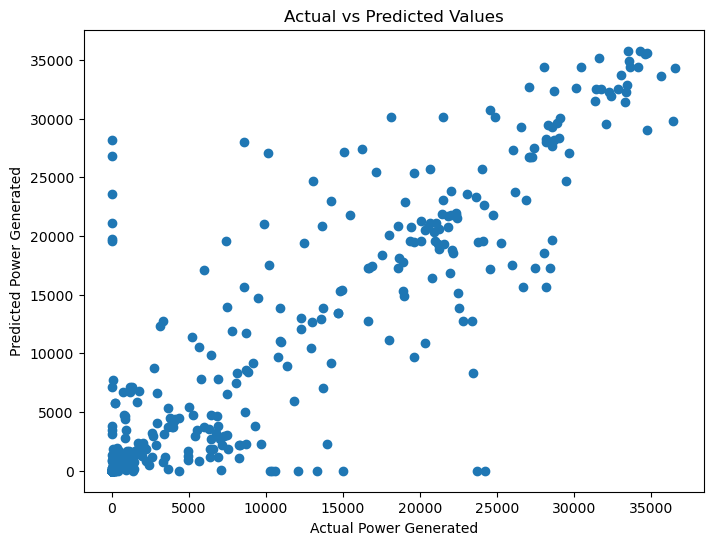

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted Values")
plt.show()

###### Random forest

In [28]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_hat=rf.predict(x_test)

rf_rmse=np.sqrt(mean_squared_error(y_test, y_hat))
rf_mae=mean_absolute_error(y_test, y_hat)
rf_r2=r2_score(y_test, y_hat)

print('rf_rmse',rf_rmse)
print('rf_mae',rf_mae)
print('rf_r2',rf_r2)

rf_rmse 3407.592113266828
rf_mae 1548.64602739726
rf_r2 0.8897664470589549


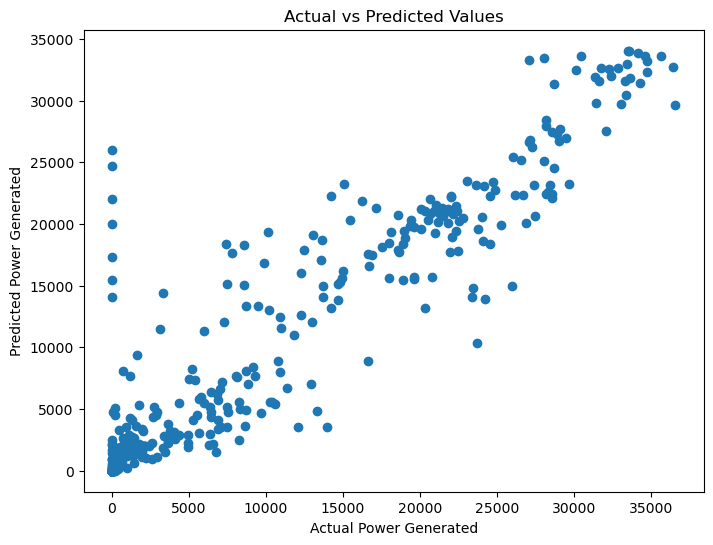

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat)
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.title("Actual vs Predicted Values")
plt.show()

#### feature importance

In [30]:
feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFEATURE IMPORTANCE")
print(feature_importance)


FEATURE IMPORTANCE
                       Feature  Importance
0       distance-to-solar-noon    0.827675
4                    sky-cover    0.083785
6                     humidity    0.023636
3                   wind-speed    0.017372
2               wind-direction    0.015208
1                  temperature    0.011007
7  average-wind-speed-(period)    0.010165
8    average-pressure-(period)    0.009559
5                   visibility    0.001594


### feature importance visualization

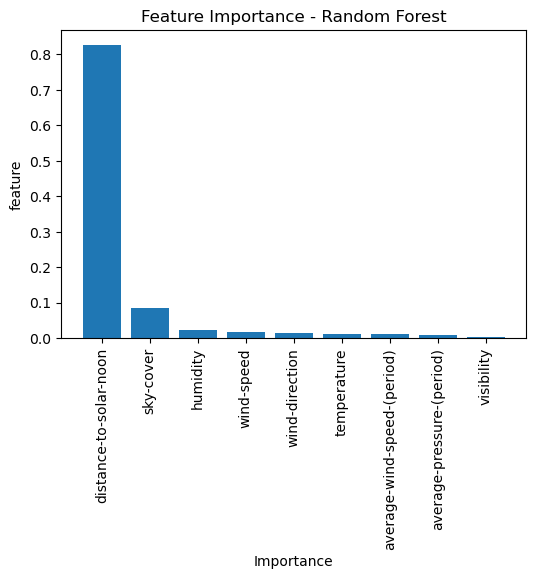

In [31]:
plt.figure(figsize=(6,4))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('feature')
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


#### Comparing models

In [32]:
compare= pd.DataFrame({
    "Model": ['Linear Regression','Gradient Descent','Decison Tree','Random Forest'],
    "R2 Score": [lr_r2, sgd_r2, dt_r2, rf_r2],
    "MAE": [lr_mae, sgd_mae, dt_mae, rf_mae],
    "RMSE": [lr_rmse, sgd_rmse, dt_rmse, rf_rmse]
}).sort_values(by='R2 Score', ascending=False)

print("\nMODEL COMPARISON")
print(compare)


MODEL COMPARISON
               Model  R2 Score          MAE         RMSE
3      Random Forest  0.889766  1548.646027  3407.592113
2       Decison Tree  0.812865  1999.256849  4439.850799
0  Linear Regression  0.625062  4981.154256  6284.499607
1   Gradient Descent  0.623355  4995.183486  6298.783942


#### best model svisualization

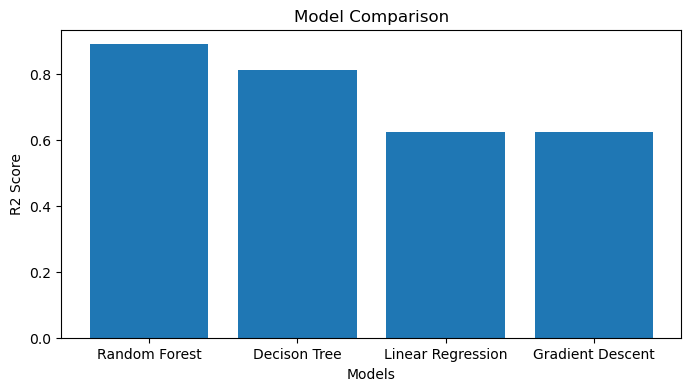

In [38]:
plt.figure(figsize=(8,4))
plt.bar(compare['Model'], compare['R2 Score'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison')
plt.show()

#### best model selection

In [39]:
best=compare.iloc[0]
print('BEST MODEL:', best['Model'])

BEST MODEL: Random Forest


#### Tuning

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_tuned = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf_tuned,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(x_train, y_train)

best_rf = grid.best_estimator_

rf_tuned_pred = best_rf.predict(x_test)

rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)

print('\nTUNED RANDOM FOREST PERFORMANCE:')
print('MAE:', rf_tuned_mae)
print('RMSE:', rf_tuned_rmse)
print('R2 Score:', rf_tuned_r2)
print('Best Parameters:', grid.best_params_)



TUNED RANDOM FOREST PERFORMANCE:
MAE: 1553.1040339594929
RMSE: 3423.4246186908745
R2 Score: 0.8887397233491794
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


#### final model selection and save model

In [37]:
joblib.dump(best_rf, 'best_rf.joblib')
print('model saved')

model saved
